In [11]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [12]:
### First of all we need to define states:
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    BMI: float

In [13]:
def calculate_BMI(state: BMIState) -> BMIState:
    weight=state['weight_kg']
    height=state['height_m']

    bmi=weight/(height**2)

    state['BMI']=round(bmi,2)

    return state



In [15]:
### Now we need to define our graph:
graph = StateGraph(state_schema=BMIState)

###Now adding nodes to the graph:
graph.add_node(
    name="calculate_BMI",
    node=calculate_BMI
)

### Adding Edges:
graph.add_edge(START,'calculate_BMI')
graph.add_edge('calculate_BMI',END)

###compiling the Graph:
workflow=graph.compile()





In [16]:
initial_state={'weight_kg':80,'height_m':1.73}
final_state=workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'BMI': 26.73}


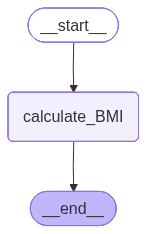

In [17]:
### Visualization
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())